In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



In [3]:
# Load the dataset
data = pd.read_csv('gas_turbines.csv.crdownload')
data


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
5647,22.1050,1013.0,92.151,4.5318,25.665,1091.2,550.00,134.50,12.150,1.2101,61.704
5648,21.5250,1012.7,90.512,4.4908,25.409,1089.9,549.88,133.74,12.100,1.4014,62.886
5649,20.7500,1011.8,90.784,4.4766,25.364,1089.6,549.88,134.00,12.085,1.8020,64.613
5650,20.3230,1011.1,92.729,4.5178,25.320,1089.4,549.68,134.00,12.033,1.8609,64.948


In [4]:
# Display the first few rows of the dataset
print(data.head())



       AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   

       CO     NOX  
0  3.1547  82.722  
1  3.2363  82.776  
2  3.2012  82.468  
3  3.1923  82.670  
4  3.2484  82.311  


In [5]:
# Data Preprocessing
# Drop any rows with missing values (NaN)
data = data.dropna()



In [6]:
# Select features (X) and target variable (y)
X = data.drop('TEY', axis=1)  # Excluding TEY as it is the target variable
y = data['TEY']



In [7]:
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
5646,21.8650,1013.0,91.903,4.4224,25.190,1088.7,550.04,12.070,1.1096,60.119
5647,22.1050,1013.0,92.151,4.5318,25.665,1091.2,550.00,12.150,1.2101,61.704
5648,21.5250,1012.7,90.512,4.4908,25.409,1089.9,549.88,12.100,1.4014,62.886
5649,20.7500,1011.8,90.784,4.4766,25.364,1089.6,549.88,12.085,1.8020,64.613


In [8]:
y

0       114.70
1       114.72
2       114.71
3       114.72
4       114.72
         ...  
5646    132.56
5647    134.50
5648    133.74
5649    134.00
5650    134.00
Name: TEY, Length: 5651, dtype: float64

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [10]:
# Build a Random Forest Regressor Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [11]:
# Predictions on the test set
y_pred = rf_model.predict(X_test)



In [12]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



In [13]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')



Mean Squared Error: 0.511185959849686
R-squared (R2) Score: 0.9979784583598671


In [14]:
# Feature Importance
feature_importance = rf_model.feature_importances_
features = X.columns



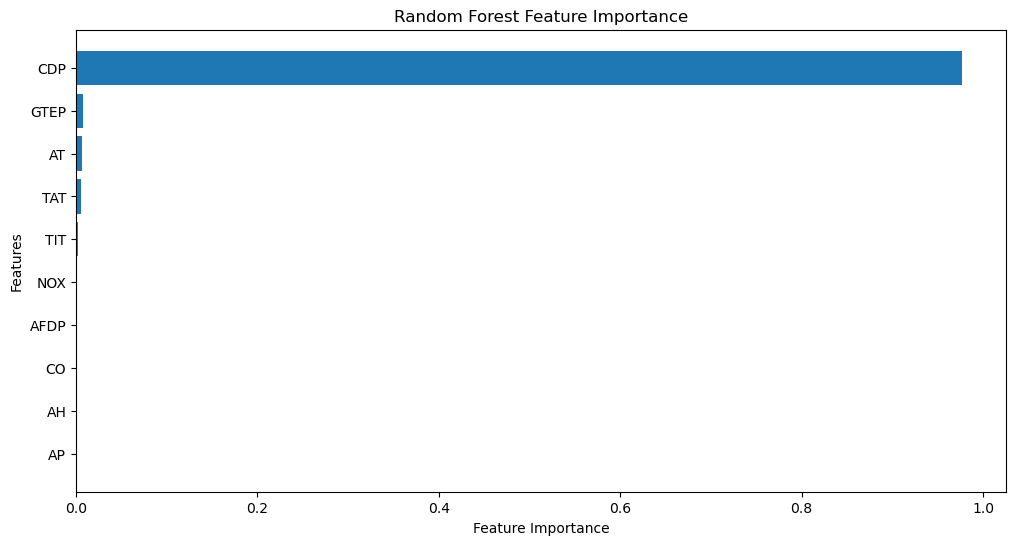

In [15]:
# Visualize Feature Importance
plt.figure(figsize=(12, 6))
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()


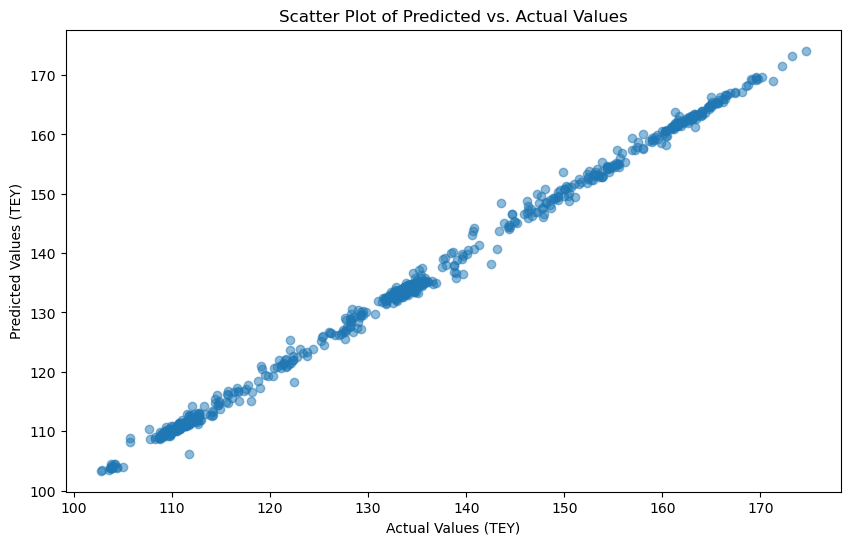

In [16]:
# Scatter Plot of Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values (TEY)')
plt.ylabel('Predicted Values (TEY)')
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.show()


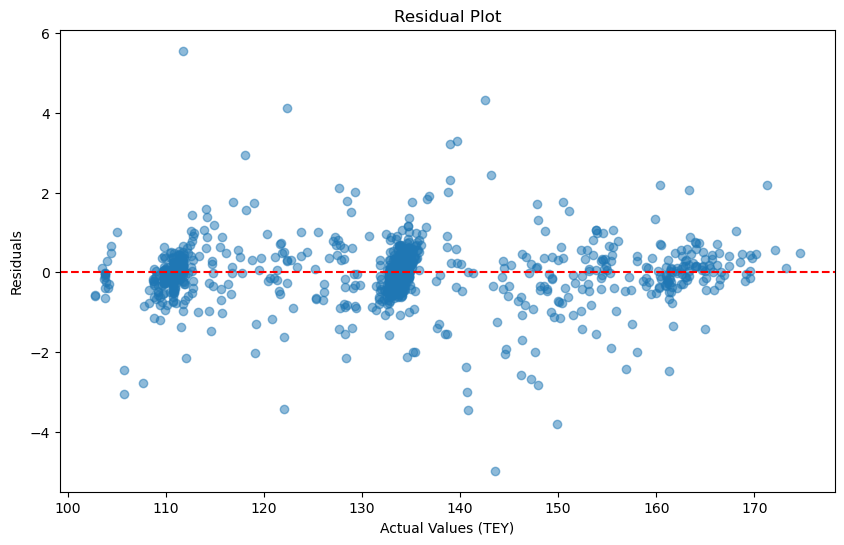

In [17]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values (TEY)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


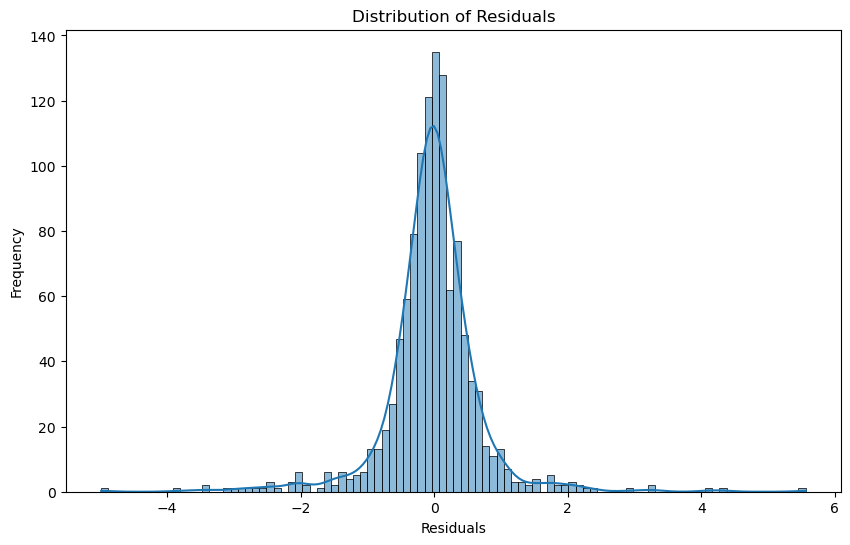

In [19]:
# Distribution of Residuals
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


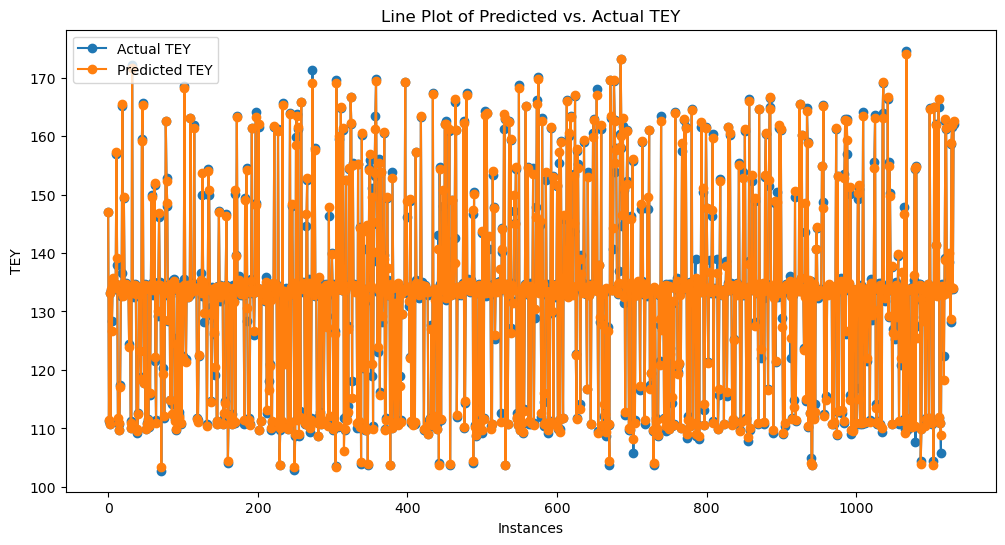

In [20]:
# Line Plot of Predicted vs. Actual Values
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual TEY', linestyle='-', marker='o')
plt.plot(y_pred, label='Predicted TEY', linestyle='-', marker='o')
plt.xlabel('Instances')
plt.ylabel('TEY')
plt.title('Line Plot of Predicted vs. Actual TEY')
plt.legend()
plt.show()


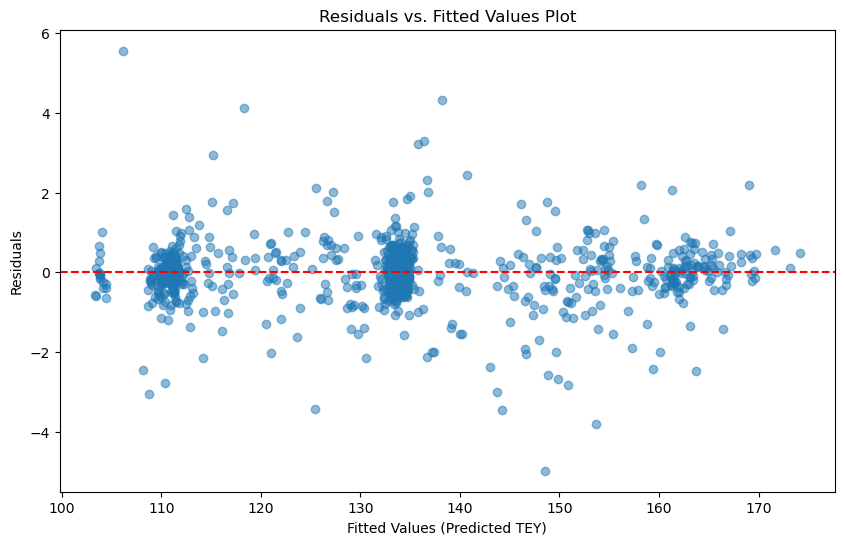

In [21]:
# Residuals vs. Fitted Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values (Predicted TEY)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values Plot')
plt.show()
